In [41]:
import numpy as np
import cv2
from IPython.display import Image

import matplotlib.pyplot as plt

LOAD_PATH = "./Image/"

#FILE_NAME, FILE_INDEX = "AQ12651390522069_1.jpg", 211
#FILE_NAME, FILE_INDEX = "IMG-7526.jpg", 326
FILE_NAME, FILE_INDEX = "CQ1386032953_1.jpg", 378

Raw = cv2.imread(LOAD_PATH+FILE_NAME)         # w/o BG, Color

print (Raw.shape)

(1675, 1200, 3)


In [42]:
def IMAGE_SView(img,tmp_file="./test.jpg",dp_opt=True,dp=100):
    cv2.imwrite(tmp_file,img)

    dpi = 200 # control parameter
    im_data = plt.imread(tmp_file)
    channel = im_data.shape
    if (dp_opt):
        figsize = channel[0] / float(dpi), channel[1] / float(dpi)
    else:
        figsize = channel[0] / float(dp), channel[1] / float(dp)
        
    fig = plt.figure(figsize=figsize)
    plt.xticks([]), plt.yticks([])
    
    plt.imshow(im_data)
    plt.show()

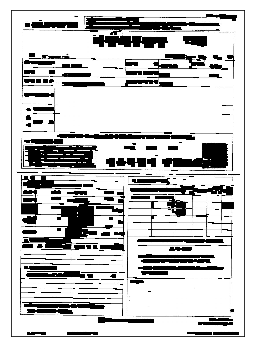

In [43]:
img  = Raw.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,127,255,0)
image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)

    channel = img.shape
    if (w < channel[0]*0.05):   ## Image, 5%
        roi=img[y:y+h,x:x+w]
        imgwcon = cv2.rectangle(img, (x, y), (x+w+10, y+h), (0,0,0), -1)

IMAGE_SView(imgwcon,tmp_file="blackboxed.png")

2 904 1653 265 18 (1675, 1200, 3) 0.1582089552238806 0.015 14.722222222222221
3 288 1653 158 18 (1675, 1200, 3) 0.09432835820895523 0.015 8.777777777777779
8 1065 1598 55 7 (1675, 1200, 3) 0.03283582089552239 0.005833333333333334 7.857142857142857
9 444 1578 289 31 (1675, 1200, 3) 0.17253731343283582 0.025833333333333333 9.32258064516129
20 513 1570 48 5 (1675, 1200, 3) 0.028656716417910448 0.004166666666666667 9.6
21 431 1569 37 4 (1675, 1200, 3) 0.02208955223880597 0.0033333333333333335 9.25
25 274 1566 35 4 (1675, 1200, 3) 0.020895522388059702 0.0033333333333333335 8.75
28 174 1564 54 5 (1675, 1200, 3) 0.032238805970149255 0.004166666666666667 10.8
29 79 1563 37 5 (1675, 1200, 3) 0.02208955223880597 0.004166666666666667 7.4
32 79 1536 240 25 (1675, 1200, 3) 0.14328358208955225 0.020833333333333332 9.6
36 64 1507 418 30 (1675, 1200, 3) 0.24955223880597016 0.025 13.933333333333334
44 400 1479 82 7 (1675, 1200, 3) 0.04895522388059702 0.005833333333333334 11.714285714285714
52 154 1450 

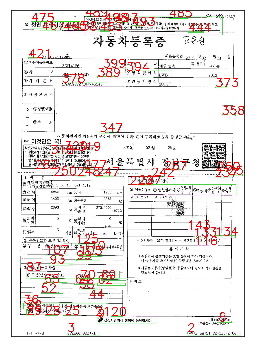

In [44]:
bbimg = cv2.imread("blackboxed.png")
img = Raw.copy()
imgwcon = Raw.copy()

gray = cv2.cvtColor(bbimg,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (5,5))
ret, thresh = cv2.threshold(blur,127,255,0)
image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

idx =0 
roi = []
selected_roi = []
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    
    channel = img.shape
    
    if ((w/h > 7) & (w/h<15)):
        roi=img[y:y+h,x:x+w]
        imgwcon = cv2.rectangle(imgwcon, (x, y), (x+w+10, y+h), (0,255,0), 1)
        imgwcon = cv2.putText(imgwcon, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 4)
        print (idx,x,y,w,h,channel,w/channel[0],h/channel[1],w/h)

        if (idx == FILE_INDEX):
            selected_roi = roi.copy()
            print ("!!!\t",x,y,w,h,channel,w/channel[0],h/channel[1],w/h)
            cv2.imwrite('Crop.png', roi)
                    
IMAGE_SView(imgwcon,tmp_file="Find_Box.jpg")

In [45]:
from PIL import Image
from pytesseract import *

### FILE_NAME, FILE_INDEX = "AQ12651390522069_1.jpg", 456

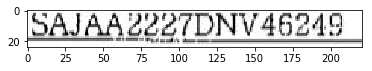

DNV462’19


In [46]:
im = Image.open("./Crop.png")

plt.imshow(im)
plt.show()

text = image_to_string(im,lang="eng") ## TESSERACT

print (text)

### FILE_NAME, FILE_INDEX = "IMG-7526.jpg", 1078

rotated angle 0.0


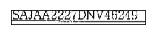

505 	 DNV462’19 	 DNV46219


In [47]:
idx =0 
for cnt in contours:
    idx += 1
    if (idx == FILE_INDEX):
        x,y,w,h = cv2.boundingRect(cnt)
        roi=img[y:y+h,x:x+w]

High_crop = cv2.resize(roi, None, fx =2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(High_crop, cv2.COLOR_BGR2GRAY)

#gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

gray = cv2.bitwise_not(gray) 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# https://docs.opencv.org/2.4/doc/tutorials/imgproc/shapedescriptors/bounding_rotated_ellipses/bounding_rotated_ellipses.html

rect=cv2.minAreaRect(coords)
points = cv2.boxPoints(rect)
points = np.int0(np.around(points))

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
    
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(roi, M, (w, h),
                         flags=cv2.INTER_CUBIC, 
                         borderMode=cv2.BORDER_REPLICATE)

print ("rotated angle",angle)

IMAGE_SView(rotated,tmp_file="High_crop_rot.png",dp_opt=False,dp = 10)
high_crop_im = Image.open("./High_crop_rot.png")

import re
text = image_to_string(high_crop_im,lang="eng")
text1 = re.sub('[^A-Z,a-z,0-9]+','',text)

print (idx,"\t",text,"\t",text1)
